# 5. Data Rate


## 5.1 Data Rate: Data Rate Limits

In [6]:
import time

def simulate_data_rate(total_data_size, rate_limit_kbps, chunk_size_kb):
    total_data_sent = 0
    start_time = time.time()

    while total_data_sent < total_data_size:
        remaining_data = total_data_size - total_data_sent
        current_chunk_size = min(chunk_size_kb, remaining_data)
        total_data_sent += current_chunk_size
        print(f"Sent {current_chunk_size} KB. Total sent: {total_data_sent}/{total_data_size} KB")
        time.sleep(current_chunk_size / rate_limit_kbps)

    end_time = time.time()
    print(f"Data transfer completed in {end_time - start_time:.2f} seconds.")

# Example use
simulate_data_rate(5000, 500, 100)


Sent 100 KB. Total sent: 100/5000 KB
Sent 100 KB. Total sent: 200/5000 KB
Sent 100 KB. Total sent: 300/5000 KB
Sent 100 KB. Total sent: 400/5000 KB
Sent 100 KB. Total sent: 500/5000 KB
Sent 100 KB. Total sent: 600/5000 KB
Sent 100 KB. Total sent: 700/5000 KB
Sent 100 KB. Total sent: 800/5000 KB
Sent 100 KB. Total sent: 900/5000 KB
Sent 100 KB. Total sent: 1000/5000 KB
Sent 100 KB. Total sent: 1100/5000 KB
Sent 100 KB. Total sent: 1200/5000 KB
Sent 100 KB. Total sent: 1300/5000 KB
Sent 100 KB. Total sent: 1400/5000 KB
Sent 100 KB. Total sent: 1500/5000 KB
Sent 100 KB. Total sent: 1600/5000 KB
Sent 100 KB. Total sent: 1700/5000 KB
Sent 100 KB. Total sent: 1800/5000 KB
Sent 100 KB. Total sent: 1900/5000 KB
Sent 100 KB. Total sent: 2000/5000 KB
Sent 100 KB. Total sent: 2100/5000 KB
Sent 100 KB. Total sent: 2200/5000 KB
Sent 100 KB. Total sent: 2300/5000 KB
Sent 100 KB. Total sent: 2400/5000 KB
Sent 100 KB. Total sent: 2500/5000 KB
Sent 100 KB. Total sent: 2600/5000 KB
Sent 100 KB. Total se

## 5.2 Date Rate: Nyquist Bit Rate

In [7]:
import math

def nyquist_bit_rate(bandwidth, levels):
    return 2 * bandwidth * math.log2(levels)

# Example use
bandwidth = 3000  # Bandwidth in Hz
levels = 2        # Number of signal levels
bitrate = nyquist_bit_rate(bandwidth, levels)
print(f"Nyquist Bit Rate: {bitrate} bps")


Nyquist Bit Rate: 6000.0 bps


## 5.3 Transmission Impairment: Nyquist Example

In [8]:
bandwidth = 3000  # Bandwidth in Hz
levels = 2        # Number of signal levels
bitrate = nyquist_bit_rate(bandwidth, levels)
print(f"Nyquist Example Bit Rate: {bitrate} bps")


Nyquist Example Bit Rate: 6000.0 bps


## 5.4 Transmission Impairment: Attenuation

In [9]:
def attenuation(original_signal_power, distance, loss_per_km):
    return original_signal_power * (10 ** (-distance * loss_per_km / 10))

# Example use
original_signal_power = 100  # in dBm
distance = 50  # Distance in km
loss_per_km = 0.5  # dB/km
attenuated_power = attenuation(original_signal_power, distance, loss_per_km)
print(f"Attenuated Signal Power: {attenuated_power} dBm")

Attenuated Signal Power: 0.31622776601683794 dBm


## 5.5 Transmission Impairment: Shannon Capacity

In [17]:
def shannon_capacity(bandwidth, snr):
    return bandwidth * math.log2(1 + snr)

## 5.6	Transmission Impairment: Shannon Capacity Example

In [16]:
bandwidth = 3000  # Bandwidth in Hz
snr = 3162  # Signal-to-noise ratio (SNR)
capacity = shannon_capacity(bandwidth, snr)
print(f"Shannon Capacity Example: {capacity} bps")

Shannon Capacity Example: 34881.23352155218 bps


## 5.7	Transmission Impairment: Using Nyquist and Shannon


In [12]:
def combined_nyquist_shannon(bandwidth, levels, snr):
    nyquist_rate = nyquist_bit_rate(bandwidth, levels)
    shannon_rate = shannon_capacity(bandwidth, snr)
    return nyquist_rate, shannon_rate

bandwidth = 3000  # Bandwidth in Hz
levels = 2        # Number of signal levels
snr = 3162        # Signal-to-noise ratio (SNR)
nyquist_rate, shannon_rate = combined_nyquist_shannon(bandwidth, levels, snr)
print(f"Nyquist Rate: {nyquist_rate} bps, Shannon Rate: {shannon_rate} bps")

Nyquist Rate: 6000.0 bps, Shannon Rate: 34881.23352155218 bps


## 5.8	Transmission Impairment: Performance Relationships

In [18]:
def latency(propagation_time, transmission_time, queuing_time, processing_delay):
    return propagation_time + transmission_time + queuing_time + processing_delay

def propagation_time(distance, propagation_speed):
    return distance / propagation_speed

def transmission_time(message_size, bandwidth):
    return message_size / bandwidth




## 5.9	Transmission Impairment: Latency, Propagation Time and Transmission Time


In [14]:
distance = 1000  
propagation_speed = 2e8 
message_size = 10 * 8 * 1024 * 1024 
bandwidth = 1 * 1e6  

prop_time = propagation_time(distance * 1000, propagation_speed)
trans_time = transmission_time(message_size, bandwidth)
latency_value = latency(prop_time, trans_time, queuing_time=0.01, processing_delay=0.005)

print(f"Propagation Time: {prop_time:.6f} seconds")
print(f"Transmission Time: {trans_time:.6f} seconds")
print(f"Total Latency: {latency_value:.6f} seconds")

Propagation Time: 0.005000 seconds
Transmission Time: 83.886080 seconds
Total Latency: 83.906080 seconds


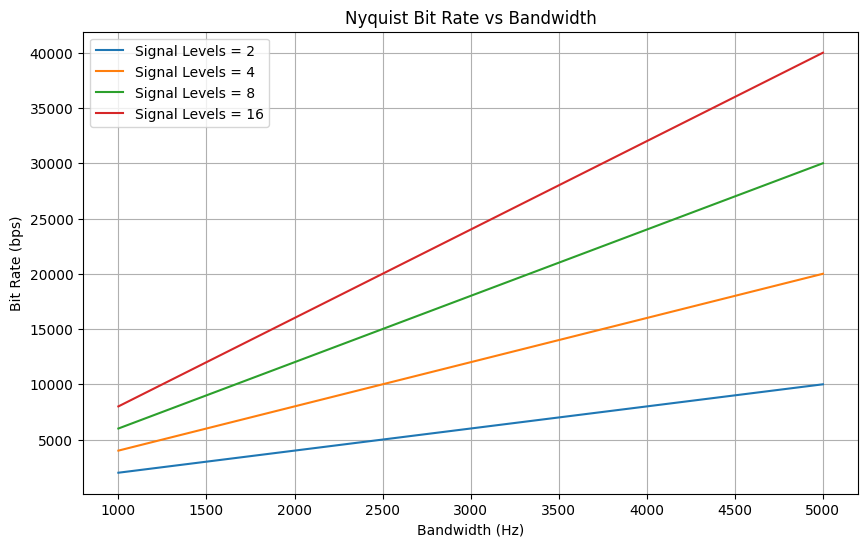

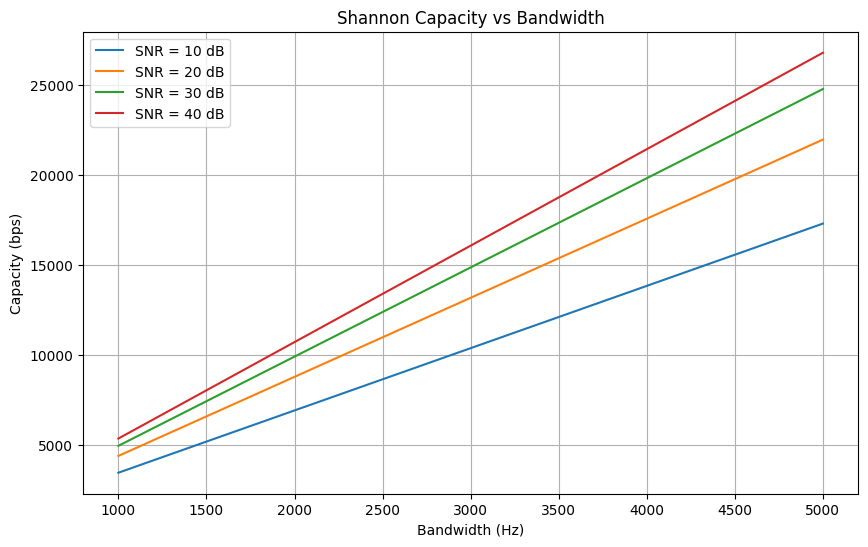

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# Hardcoded sample data
bandwidths = np.array([1000, 2000, 3000, 4000, 5000])  # Bandwidths in Hz
signal_levels = [2, 4, 8, 16]  # Signal levels
snr_values = [10, 20, 30, 40]  # SNR in dB

# Plot Nyquist Bit Rate vs Bandwidth for different signal levels
plt.figure(figsize=(10, 6))
for levels in signal_levels:
    bit_rates = nyquist_bit_rate(bandwidths, levels)
    plt.plot(bandwidths, bit_rates, label=f'Signal Levels = {levels}')

plt.title('Nyquist Bit Rate vs Bandwidth')
plt.xlabel('Bandwidth (Hz)')
plt.ylabel('Bit Rate (bps)')
plt.grid(True)
plt.legend()
plt.show()

# Plot Shannon Capacity vs Bandwidth for different SNR values
plt.figure(figsize=(10, 6))
for snr in snr_values:
    capacities = shannon_capacity(bandwidths, snr)
    plt.plot(bandwidths, capacities, label=f'SNR = {snr} dB')

plt.title('Shannon Capacity vs Bandwidth')
plt.xlabel('Bandwidth (Hz)')
plt.ylabel('Capacity (bps)')
plt.grid(True)
plt.legend()
plt.show()
